### 1- Install Dependencies

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 18.7 MB/s eta 0:00:00


### 2- Import Required Libraries and Mount Google Drive

In [25]:
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
import os
import shutil

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3- Load and Prepare Dataset
(90% train, 10% validation)

In [24]:
# Path to your labeled dataset
dataset_path = '/content/drive/MyDrive/labelled-yolo-dataset'

In [26]:
# Paths for images and classes file
images_path = os.path.join(dataset_path, 'images')
classes_file = os.path.join(dataset_path, 'classes.txt')

In [27]:
# Read image paths
image_files = [os.path.join(images_path, img) for img in os.listdir(images_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

In [28]:
# Split dataset into train and validation (90% train, 10% validation)
train_images, val_images = train_test_split(image_files, test_size=0.1, random_state=42)

# Create text files for train and validation image paths
with open(os.path.join(dataset_path, 'train.txt'), 'w') as train_file:
    train_file.write('\n'.join(train_images))

with open(os.path.join(dataset_path, 'val.txt'), 'w') as val_file:
    val_file.write('\n'.join(val_images))


In [29]:
# Verify dataset structure
print(f"Total images: {len(image_files)}")
print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")

Total images: 85
Training images: 76
Validation images: 9


### 4- YOLO Model Configuration:
Create a data.yaml file that includes:

  i. Path to the dataset

  ii. Training and validation text files containing image paths

  iii. Number of classes and class names

In [30]:
# Create a YOLO model configuration YAML file
data_yaml = f"""
path: {dataset_path}
train: train.txt
val: val.txt
nc: {len(open(classes_file).readlines())}  # Number of classes
names: {open(classes_file).read().splitlines()}  # Class names
"""

In [31]:
with open(os.path.join(dataset_path, 'data.yaml'), 'w') as yaml_file:
    yaml_file.write(data_yaml)

print("\nData configuration YAML file created.")


Data configuration YAML file created.


### 5- Load Pre-trained YOLO Model

In [32]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.3MB/s]


### 6- Train the Model

In [34]:
# Train the model
model.train(
    data=os.path.join(dataset_path, 'data.yaml'),  # Path to YAML file
    epochs=50,  # Number of epochs
    batch=16,  # Batch size
    imgsz=640,  # Image size
    workers=2,  # Number of workers
    name="yolo11n.pt"  # Model name
)

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/labelled-yolo-dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=yolo11n.pt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/drive/MyDrive/labelled-yolo-dataset/labels... 76 images, 1 backgrounds, 0 corrupt: 100%|██████████| 76/76 [01:02<00:00,  1.22it/s]

train: New cache created: /content/drive/MyDrive/labelled-yolo-dataset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/labelled-yolo-dataset/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]

val: New cache created: /content/drive/MyDrive/labelled-yolo-dataset/labels.cache


Plotting labels to runs/detect/yolo11n.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n.pt
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G     0.9457      3.441      1.407         38        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          9         11     0.0213       0.65     0.0756     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.36G     0.8986      3.393      1.345         39        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all          9         11    0.00128        0.6      0.234      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.37G     0.7935      3.207      1.272         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          9         11      0.068       0.65      0.291      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.38G     0.8208      3.177      1.286         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          9         11      0.101       0.65      0.374      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.38G     0.8097      3.067      1.262         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all          9         11      0.101       0.95      0.454      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.36G     0.7668      2.982      1.281         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


                   all          9         11     0.0602          1      0.599      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G     0.8072      2.926       1.26         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          9         11     0.0228          1      0.677      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.38G     0.7618      2.729       1.23         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


                   all          9         11     0.0165          1      0.763      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G     0.8069      2.572      1.269         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all          9         11      0.009          1      0.799      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.36G     0.8366      2.456      1.289         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all          9         11    0.00681          1      0.779      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G     0.8708       2.36      1.265         39        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all          9         11    0.00609          1       0.67      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.38G     0.8817       2.19      1.274         43        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          9         11      0.513      0.808      0.803      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G      0.828        2.1      1.288         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all          9         11       0.93        0.2      0.785      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.38G     0.7754       1.94      1.229         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          9         11      0.923        0.4       0.77      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.37G     0.8428      1.886      1.314         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          9         11      0.481      0.705      0.759       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.38G     0.7691      1.825      1.191         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all          9         11      0.484      0.722      0.686      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G     0.8726      1.783      1.308         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all          9         11      0.456      0.567      0.656      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G     0.8813      1.814      1.307         35        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          9         11      0.795      0.668      0.801      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.8647      1.713      1.279         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all          9         11      0.425        0.7      0.777      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G     0.7696      1.624      1.209         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all          9         11      0.552       0.73      0.735      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G     0.7485      1.529      1.233         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


                   all          9         11      0.534      0.751      0.726      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.37G     0.7823      1.519      1.253         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all          9         11      0.636      0.784      0.847      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.38G     0.7757      1.525      1.221         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all          9         11      0.647      0.854      0.875      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.7256      1.384      1.161         42        640: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          9         11      0.721      0.817      0.911      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G     0.7884      1.395      1.232         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all          9         11      0.896        0.8      0.917      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G     0.7211      1.318      1.212         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          9         11      0.635      0.882      0.911      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G     0.7075      1.283      1.168         43        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          9         11      0.487      0.883      0.782      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G     0.7189      1.215      1.139         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all          9         11      0.572      0.857      0.819      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.36G     0.7038      1.294      1.152         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          9         11      0.723      0.788      0.886      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.37G     0.7415      1.292      1.178         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all          9         11      0.608      0.813      0.879      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G     0.7174       1.26      1.173         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


                   all          9         11      0.611      0.728      0.837      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G     0.6903      1.266      1.149         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          9         11      0.756      0.731      0.847      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.36G     0.6919      1.217      1.178         35        640: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          9         11      0.734      0.762      0.818       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.41G     0.6728      1.127      1.134         35        640: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all          9         11      0.611      0.801      0.781      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G     0.6369      1.127      1.158         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all          9         11       0.61      0.814      0.783      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.38G     0.6384      1.048      1.102         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          9         11      0.817       0.73       0.76        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.6914      1.136      1.149         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all          9         11      0.799      0.739      0.731      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G     0.6174      1.091      1.102         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          9         11        0.8      0.744      0.727      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.6035     0.9808      1.076         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


                   all          9         11      0.769      0.737      0.714       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G     0.6187      1.088       1.13         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          9         11      0.831       0.75      0.752      0.636


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.54G     0.5288      1.531      1.114         17        640: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all          9         11      0.837       0.75      0.753      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.36G      0.473      1.511      1.044         21        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all          9         11      0.838      0.749      0.755      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.36G     0.4943      1.385      1.054         16        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          9         11      0.754       0.75      0.728      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G     0.4655      1.383      1.057         13        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all          9         11      0.771       0.72      0.732      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G     0.4425      1.438      1.015         13        640: 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          9         11      0.521      0.813      0.755      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G     0.4399       1.37     0.9979         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all          9         11      0.561      0.842      0.778      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G     0.4352      1.387     0.9903         17        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          9         11      0.552      0.817      0.854      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.36G     0.4618      1.352      1.033         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          9         11      0.663      0.859      0.913      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.36G     0.4308        1.3     0.9984         16        640: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          9         11      0.707      0.847      0.918      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.37G     0.4087      1.313     0.9748         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all          9         11      0.738       0.84      0.886      0.782

50 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/yolo11n.pt/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n.pt/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n.pt/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]


                   all          9         11      0.707      0.847      0.918       0.79
                  ball          2          2      0.787          1      0.995      0.895
                   bat          1          1      0.512          1      0.995       0.92
                gloves          3          4          1      0.852      0.995      0.795
              grippers          2          3      0.526      0.385      0.608      0.342
                helmet          1          1      0.707          1      0.995      0.995
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/yolo11n.pt


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791f7c54c950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### 7- Save the Trained Model

In [45]:
# Save the model after training
model.save('/content/drive/MyDrive/yolo11n_finetuned.pt')

### 8- Inference on Test Images


image 1/1 /content/bal117.jpg: 640x640 4 balls, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


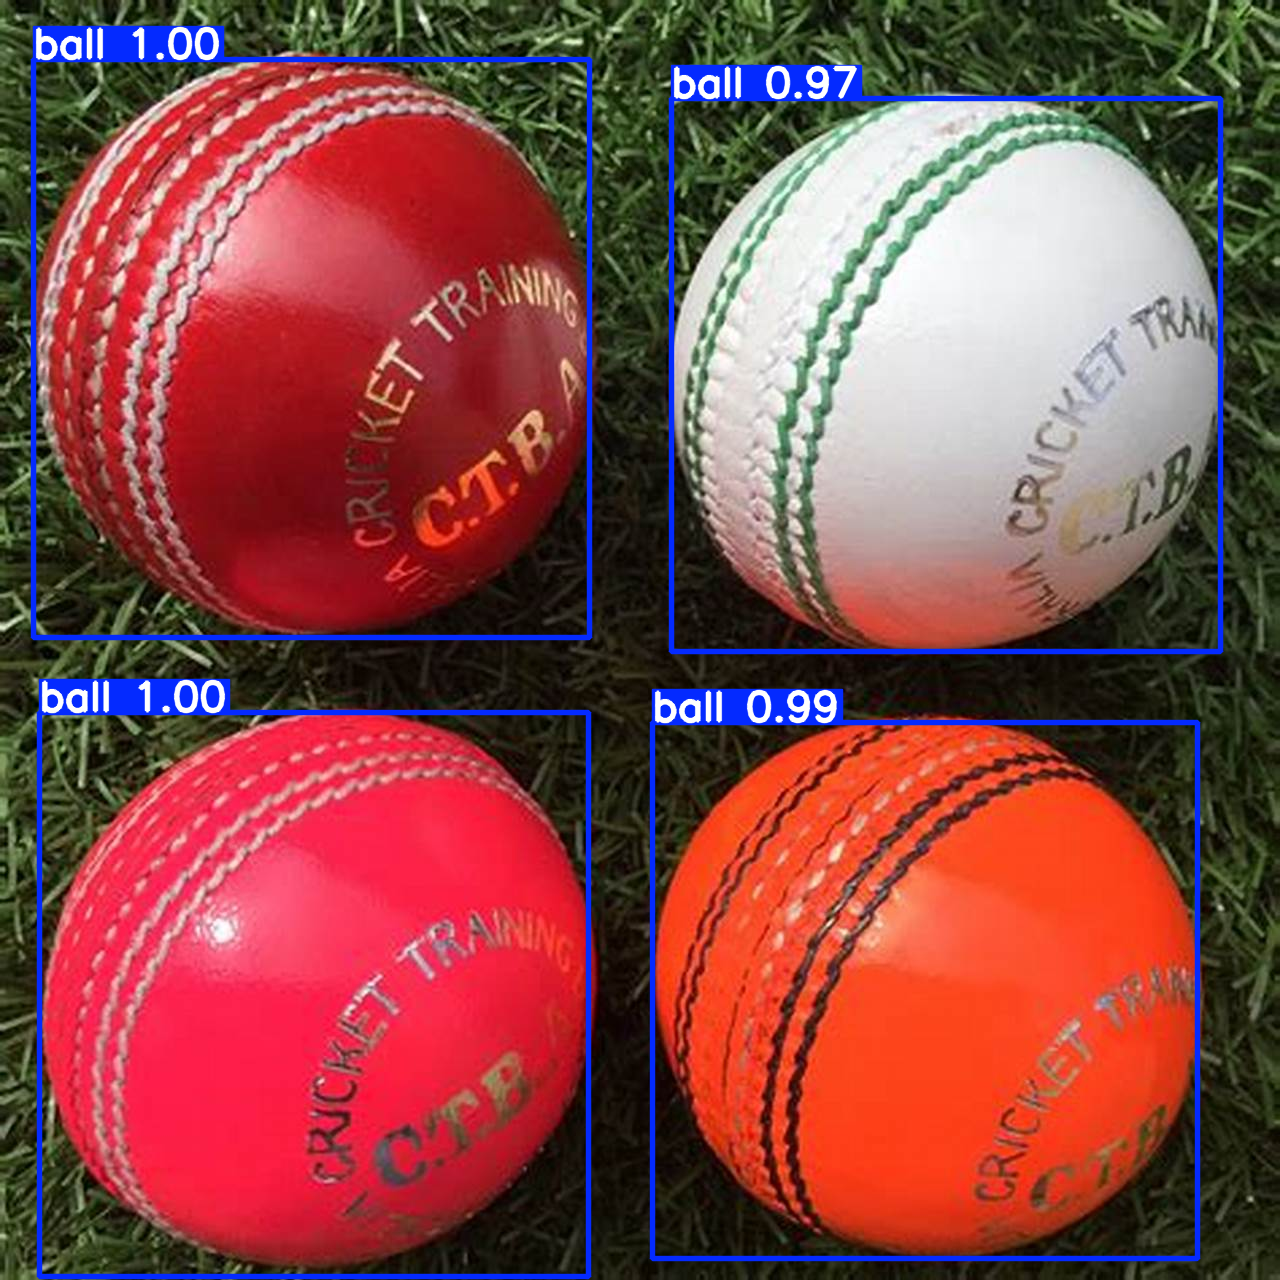

Box: tensor([[311.7543, 348.3470, 556.4612, 578.5874]], device='cuda:0') | Confidence: tensor([0.9973], device='cuda:0') | Class: tensor([0.], device='cuda:0')
Box: tensor([[313.8622, 994.8082, 549.1437, 563.8318]], device='cuda:0') | Confidence: tensor([0.9969], device='cuda:0') | Class: tensor([0.], device='cuda:0')
Box: tensor([[924.9514, 990.6353, 544.2261, 535.5309]], device='cuda:0') | Confidence: tensor([0.9932], device='cuda:0') | Class: tensor([0.], device='cuda:0')
Box: tensor([[945.7280, 375.1044, 548.9087, 553.0266]], device='cuda:0') | Confidence: tensor([0.9678], device='cuda:0') | Class: tensor([0.], device='cuda:0')


In [59]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model = YOLO('/content/drive/MyDrive/yolo11n_finetuned.pt')

# Path to the test image (provide the path to the image you want to test)
test_image_path = '/content/bal117.jpg'

# Perform inference on the test image
results = model(test_image_path)
result = results[0]  # Assuming you want to work with the first result

# Display the results
result.show()  # This will show the image with predictions

# Optionally, save the output image with predictions
output_image_path = '/content/test_image_output.jpg'
result.save(output_image_path)

# Get predictions' details (e.g., bounding boxes, confidence)
boxes = result.boxes  # Get the bounding boxes
# The `boxes` attribute contains the following: [x1, y1, x2, y2, confidence, class]
# You can access these values like this:

for box in boxes:
    print(f"Box: {box.xywh} | Confidence: {box.conf} | Class: {box.cls}")

